In [2]:
import pandas as pd
import seaborn as sns
data=sns.load_dataset("tips")
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [9]:
data.describe().round()

,total_bill,tip,size
count,244.0,244.0,244.0
mean,20.0,3.0,3.0
std,9.0,1.0,1.0
min,3.0,1.0,1.0
25%,13.0,2.0,2.0
50%,18.0,3.0,2.0
75%,24.0,4.0,3.0
max,51.0,10.0,6.0


Plotting basics: Scatter Plot

In [11]:
import matplotlib.pyplot as plt
#the figure display on the notebook instead of a seperate window
%matplotlib inline

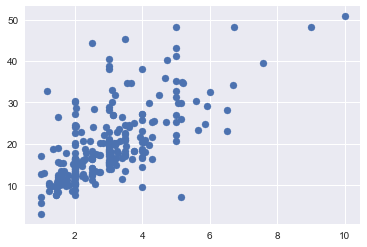

In [12]:
#matplotlib option for scatter plot
plt.scatter(data['tip'], data['total_bill'])
plt.show()

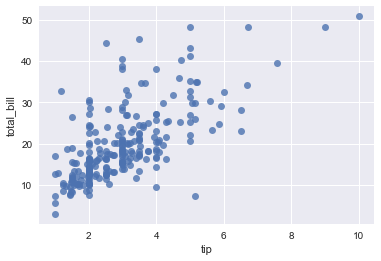

In [13]:
#seaborn option for scatter plot
sns.regplot(x='tip', y='total_bill', data=data, fit_reg=False)
sns.plt.show()

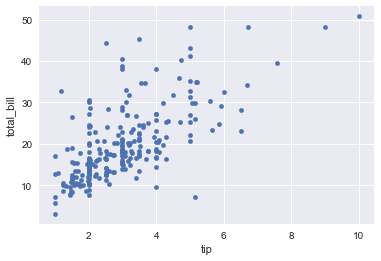

In [19]:
#Use pandas to generate scatter plot
data = pd.DataFrame(data=data)
data.plot(kind='scatter',x='tip', y='total_bill')
plt.show()


Plotting basics: Histogram

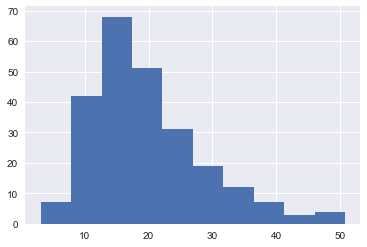

In [21]:
plt.hist(data['total_bill'])
plt.show()

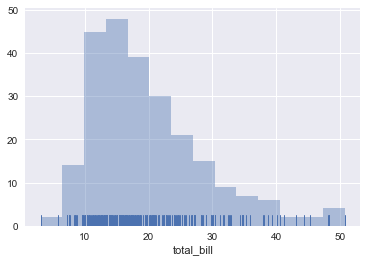

In [25]:
#kde: bool, optional, Whether to plot a gaussian kernel density estimate.
#rug : bool, optional, Whether to draw a rugplot on the support axis.
sns.distplot(data['total_bill'], kde=None, rug= True)
sns.plt.show()

Seaborn: control the figure aesthetics

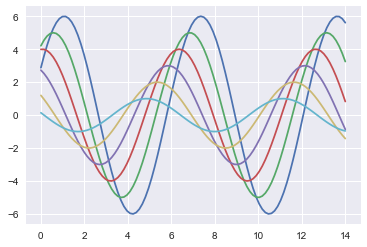

In [30]:
#generating example sin plot
import matplotlib as mpl
import numpy as np
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x+i*.5)*(7-i)*flip)
sinplot()

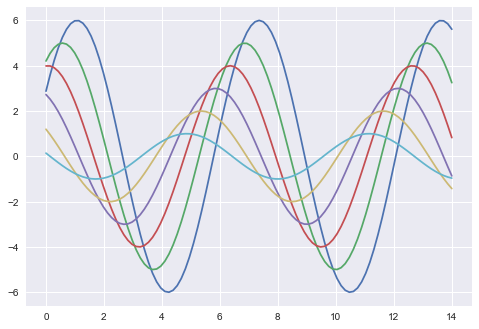

In [32]:
#switch to seaborn defaults
sns.set()
sinplot()

In [1]:
#changing seaborn themes(default is darkgrid)
#There are five preset seaborn themes: darkgrid, whitegrid, dark, white, and ticks
sns.set_style("whitegrid")
boxdata = np.random.normal(size=(20, 6)) + np.arange(6) / 2
sns.boxplot(data=boxdata)

NameError: name 'sns' is not defined

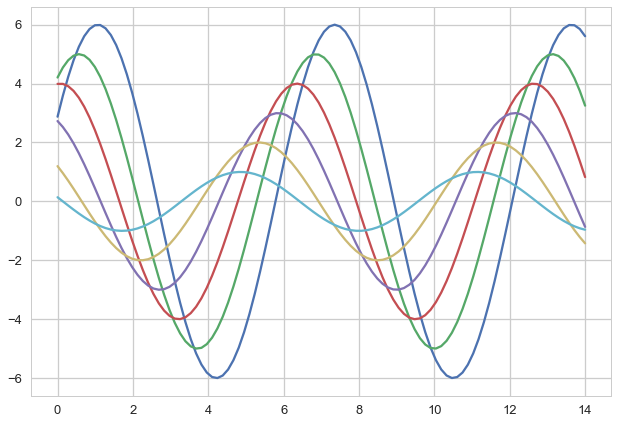

In [38]:
#The four preset contexts, in order of relative size, are paper, notebook, talk, and poster. 
#The notebook style is the default, and was used in the plots above.
sns.set_context("talk")
sinplot()

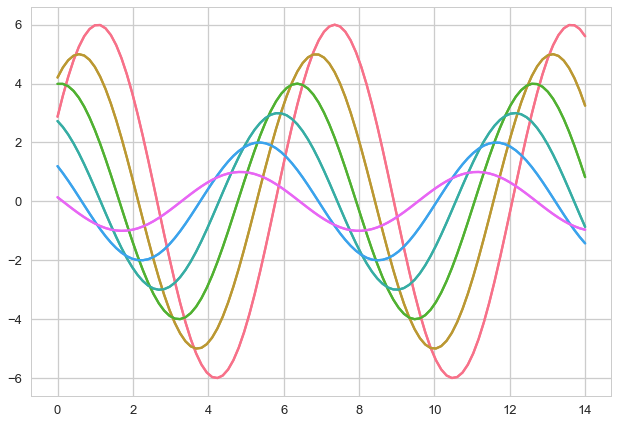

In [41]:
#changing colour palette
sns.set_palette("husl")
sinplot()

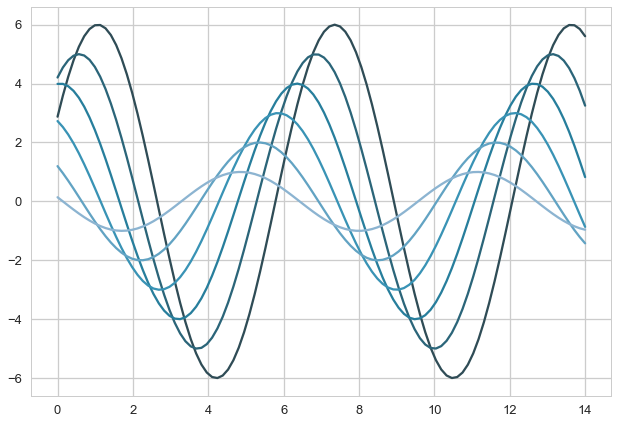

In [42]:
#temperorily changing colour palette
with sns.color_palette("PuBuGn_d"):
    sinplot()

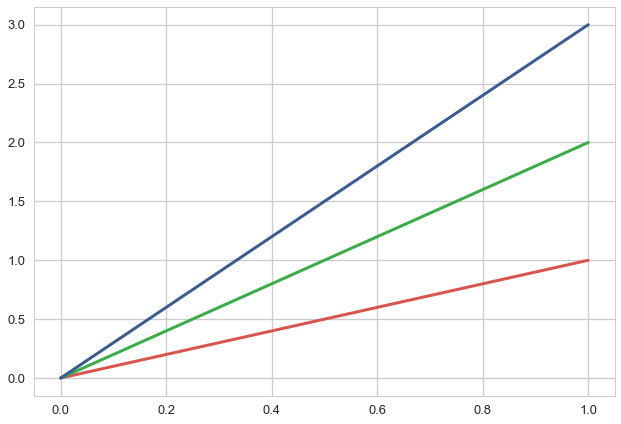

In [40]:
#choosing colour from xkcd_rgb ditionary
plt.plot([0, 1], [0, 1], sns.xkcd_rgb["pale red"], lw=3)
plt.plot([0, 1], [0, 2], sns.xkcd_rgb["medium green"], lw=3)
plt.plot([0, 1], [0, 3], sns.xkcd_rgb["denim blue"], lw=3);

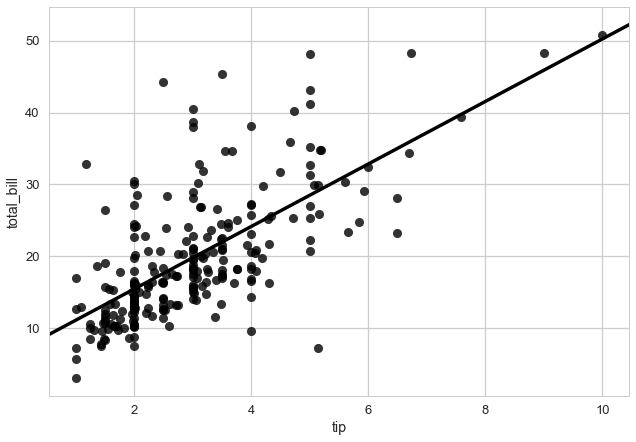

In [43]:
sns.set_style('whitegrid')
sns.regplot(x='tip', y='total_bill', data=data, ci=None, color='black')
sns.plt.show()

Categorical box plots for exploratory data analysis. 
we often want to visualise how a categorical variable affects a numerical variable of interest.

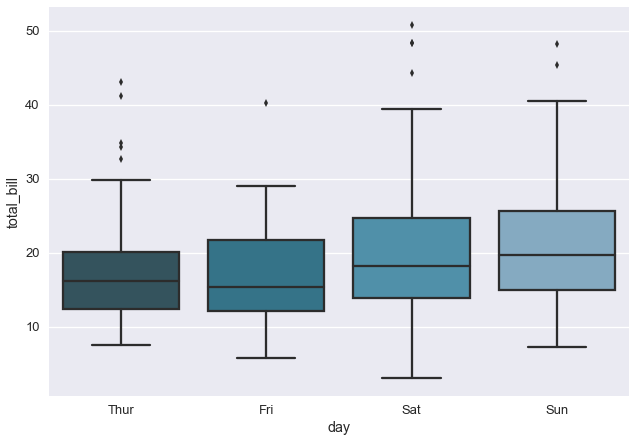

In [45]:
#categorical box plots
sns.set_style('darkgrid')
sns.boxplot(x='day', y='total_bill', data=data, palette='PuBuGn_d')
sns.plt.show()

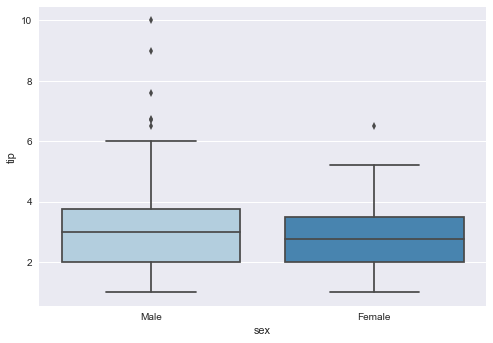

In [3]:
sns.boxplot(x='sex', y='tip', data=data, palette='Blues')
sns.plt.show()

swarm plot: which allows to see the distribution of values for each category 
by avoiding overlapping points.

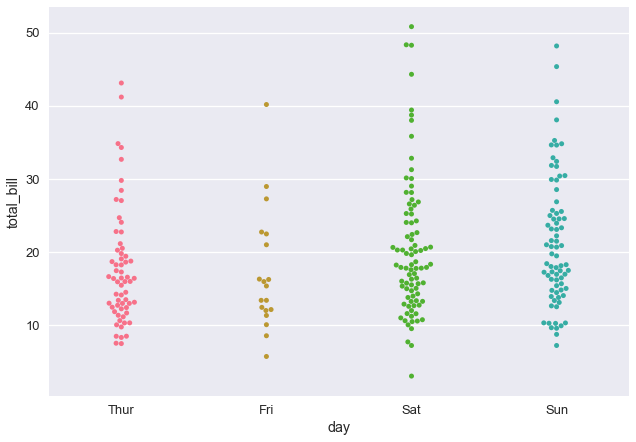

In [47]:
sns.swarmplot(x='day', y='total_bill', data=data)
sns.plt.show()

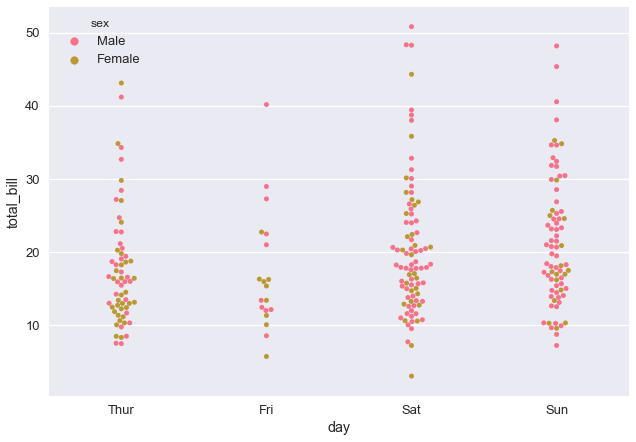

In [48]:
#hue: colour codes points according to a categorical variable.
sns.swarmplot(x='day', y='total_bill', data=data, hue='sex')
sns.plt.show()

Join Plot for numerical variables

/Users/carolchen/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


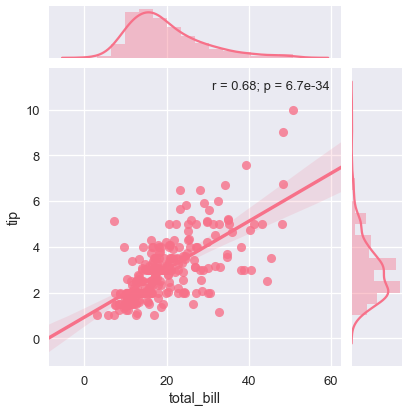

In [49]:
sns.jointplot("total_bill", "tip", data=data, kind="reg", annot_kws=dict(stat="r"))
sns.plt.show()

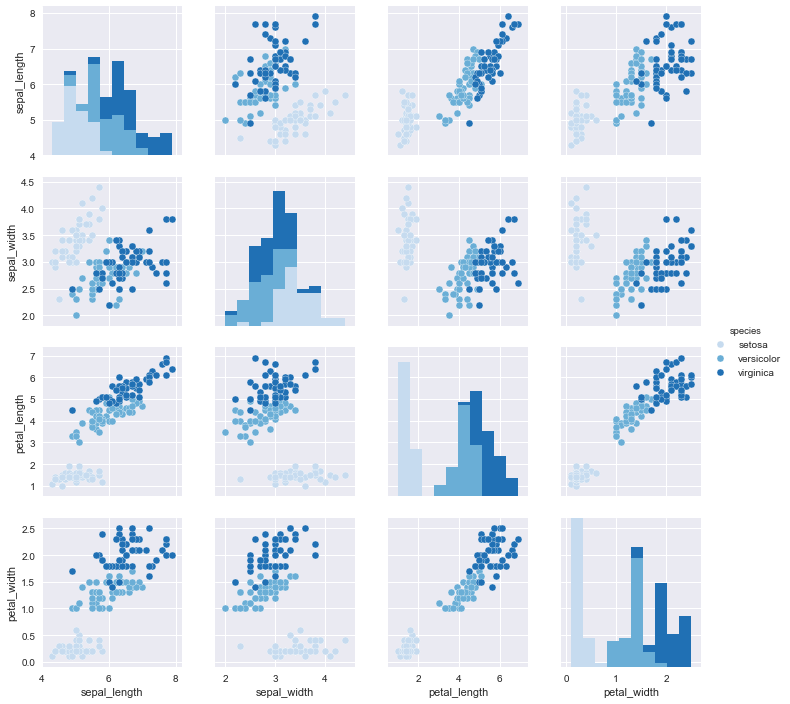

In [53]:
df = sns.load_dataset('iris') # temporarily using a different dataset for this one
sns.pairplot(df, palette='Blues', hue='species')
sns.plt.show()

Customisation: The high level functions allow for some degree of customisation

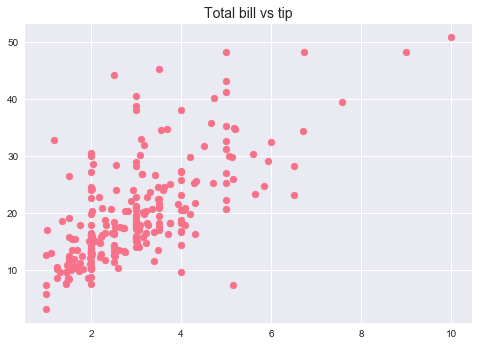

In [56]:
plt.scatter(data['tip'], data['total_bill'])
plt.title('Total bill vs tip', fontdict={'fontsize': 14})
plt.ylabel('')
plt.show()

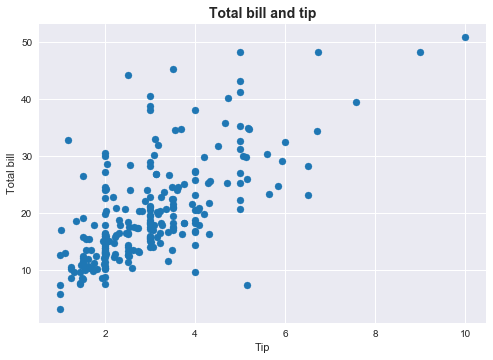

In [57]:
#the fig object is the whole painting, including the frame, and ax is the canvas. 
#fig, ax= plt.subplots() therefore creates a figure object and an empty canvas for your to build on.
fig, ax= plt.subplots()
ax.scatter(data['tip'], data['total_bill'], color='#1F77B4')
ax.set_title('Total bill and tip', fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax.set_ylabel('Total bill')
ax.set_xlabel('Tip')
plt.show()

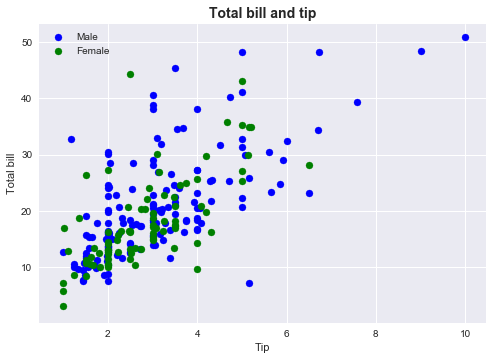

In [58]:
fig, ax= plt.subplots()
ax.scatter(data[data['sex']=='Male']['tip'], data[data['sex']=='Male']['total_bill'], color='blue', label='Male')
ax.scatter(data[data['sex']=='Female']['tip'], data[data['sex']=='Female']['total_bill'], color='green', label='Female')
ax.set_title('Total bill and tip', fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax.set_ylabel('Total bill')
ax.set_xlabel('Tip')
ax.legend()
plt.show()

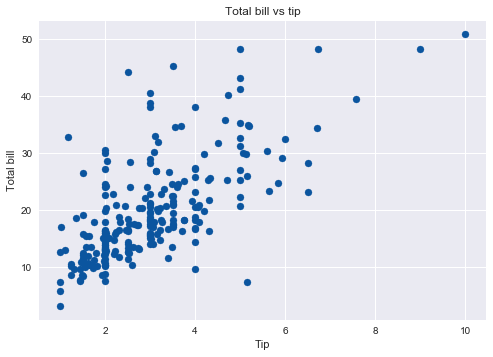

In [59]:
fig, ax= plt.subplots()
ax.scatter(data['tip'], data['total_bill'], color=sns.color_palette('Blues')[-1])
ax.set(title='Total bill vs tip', ylabel='Total bill', xlabel='Tip')
plt.show()

Saving figures

In [60]:
fig.savefig('tips.png', format='png', dpi=250)

Multiple figures in one line

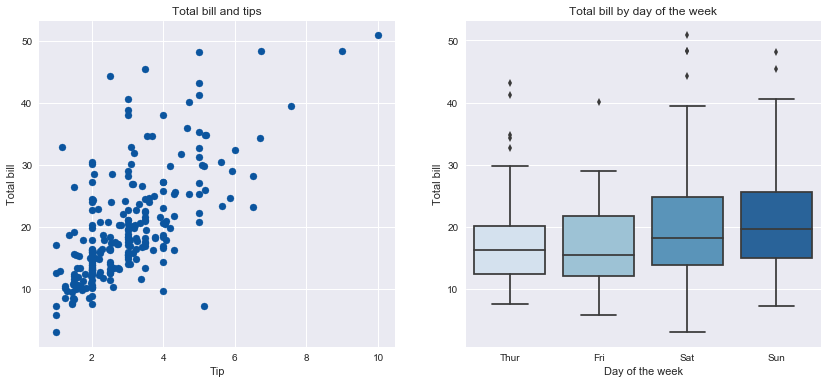

In [61]:
fig, ax= plt.subplots(nrows=1,ncols=2,b figsize=(14,6))
ax[0].scatter(data['tip'], data['total_bill'], color=sns.color_palette('Blues')[-1])
ax[0].set(title='Total bill and tips', ylabel='Total bill', xlabel='Tip')
sns.boxplot(x='day', y='total_bill', data=data, palette='Blues', ax=ax[1])
ax[1].set(title='Total bill by day of the week', ylabel='Total bill', xlabel='Day of the week')
plt.show()

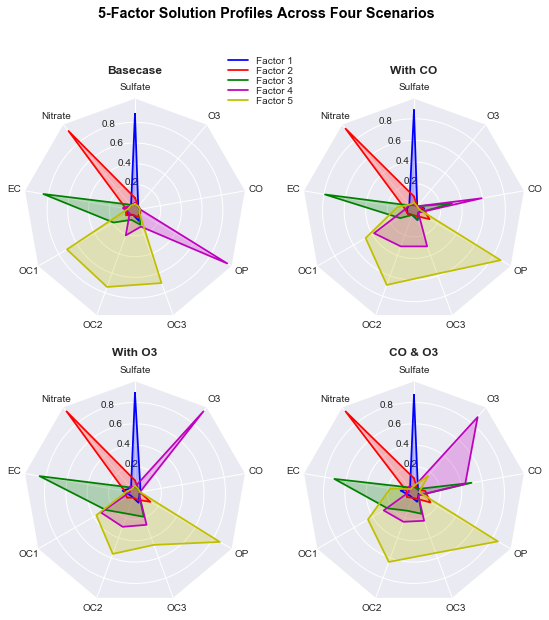

In [62]:
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection


def radar_factory(num_vars, frame='circle'):
    """Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle' | 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    def draw_poly_patch(self):
        # rotate theta such that the first axis is at the top
        verts = unit_poly_verts(theta + np.pi / 2)
        return plt.Polygon(verts, closed=True, edgecolor='k')

    def draw_circle_patch(self):
        # unit circle centered on (0.5, 0.5)
        return plt.Circle((0.5, 0.5), 0.5)

    patch_dict = {'polygon': draw_poly_patch, 'circle': draw_circle_patch}
    if frame not in patch_dict:
        raise ValueError('unknown value for `frame`: %s' % frame)

    class RadarAxes(PolarAxes):

        name = 'radar'
        # use 1 line segment to connect specified points
        RESOLUTION = 1
        # define draw_frame method
        draw_patch = patch_dict[frame]

        def __init__(self, *args, **kwargs):
            super(RadarAxes, self).__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, **kwargs):
            """Override fill so that line is closed by default"""
            closed = kwargs.pop('closed', True)
            return super(RadarAxes, self).fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super(RadarAxes, self).plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            return self.draw_patch()

        def _gen_axes_spines(self):
            if frame == 'circle':
                return PolarAxes._gen_axes_spines(self)
            # The following is a hack to get the spines (i.e. the axes frame)
            # to draw correctly for a polygon frame.

            # spine_type must be 'left', 'right', 'top', 'bottom', or `circle`.
            spine_type = 'circle'
            verts = unit_poly_verts(theta + np.pi / 2)
            # close off polygon by repeating first vertex
            verts.append(verts[0])
            path = Path(verts)

            spine = Spine(self, spine_type, path)
            spine.set_transform(self.transAxes)
            return {'polar': spine}

    register_projection(RadarAxes)
    return theta


def unit_poly_verts(theta):
    """Return vertices of polygon for subplot axes.

    This polygon is circumscribed by a unit circle centered at (0.5, 0.5)
    """
    x0, y0, r = [0.5] * 3
    verts = [(r*np.cos(t) + x0, r*np.sin(t) + y0) for t in theta]
    return verts


def example_data():
    # The following data is from the Denver Aerosol Sources and Health study.
    # See  doi:10.1016/j.atmosenv.2008.12.017
    #
    # The data are pollution source profile estimates for five modeled
    # pollution sources (e.g., cars, wood-burning, etc) that emit 7-9 chemical
    # species. The radar charts are experimented with here to see if we can
    # nicely visualize how the modeled source profiles change across four
    # scenarios:
    #  1) No gas-phase species present, just seven particulate counts on
    #     Sulfate
    #     Nitrate
    #     Elemental Carbon (EC)
    #     Organic Carbon fraction 1 (OC)
    #     Organic Carbon fraction 2 (OC2)
    #     Organic Carbon fraction 3 (OC3)
    #     Pyrolized Organic Carbon (OP)
    #  2)Inclusion of gas-phase specie carbon monoxide (CO)
    #  3)Inclusion of gas-phase specie ozone (O3).
    #  4)Inclusion of both gas-phase species is present...
    data = [
        ['Sulfate', 'Nitrate', 'EC', 'OC1', 'OC2', 'OC3', 'OP', 'CO', 'O3'],
        ('Basecase', [
            [0.88, 0.01, 0.03, 0.03, 0.00, 0.06, 0.01, 0.00, 0.00],
            [0.07, 0.95, 0.04, 0.05, 0.00, 0.02, 0.01, 0.00, 0.00],
            [0.01, 0.02, 0.85, 0.19, 0.05, 0.10, 0.00, 0.00, 0.00],
            [0.02, 0.01, 0.07, 0.01, 0.21, 0.12, 0.98, 0.00, 0.00],
            [0.01, 0.01, 0.02, 0.71, 0.74, 0.70, 0.00, 0.00, 0.00]]),
        ('With CO', [
            [0.88, 0.02, 0.02, 0.02, 0.00, 0.05, 0.00, 0.05, 0.00],
            [0.08, 0.94, 0.04, 0.02, 0.00, 0.01, 0.12, 0.04, 0.00],
            [0.01, 0.01, 0.79, 0.10, 0.00, 0.05, 0.00, 0.31, 0.00],
            [0.00, 0.02, 0.03, 0.38, 0.31, 0.31, 0.00, 0.59, 0.00],
            [0.02, 0.02, 0.11, 0.47, 0.69, 0.58, 0.88, 0.00, 0.00]]),
        ('With O3', [
            [0.89, 0.01, 0.07, 0.00, 0.00, 0.05, 0.00, 0.00, 0.03],
            [0.07, 0.95, 0.05, 0.04, 0.00, 0.02, 0.12, 0.00, 0.00],
            [0.01, 0.02, 0.86, 0.27, 0.16, 0.19, 0.00, 0.00, 0.00],
            [0.01, 0.03, 0.00, 0.32, 0.29, 0.27, 0.00, 0.00, 0.95],
            [0.02, 0.00, 0.03, 0.37, 0.56, 0.47, 0.87, 0.00, 0.00]]),
        ('CO & O3', [
            [0.87, 0.01, 0.08, 0.00, 0.00, 0.04, 0.00, 0.00, 0.01],
            [0.09, 0.95, 0.02, 0.03, 0.00, 0.01, 0.13, 0.06, 0.00],
            [0.01, 0.02, 0.71, 0.24, 0.13, 0.16, 0.00, 0.50, 0.00],
            [0.01, 0.03, 0.00, 0.28, 0.24, 0.23, 0.00, 0.44, 0.88],
            [0.02, 0.00, 0.18, 0.45, 0.64, 0.55, 0.86, 0.00, 0.16]])
    ]
    return data


if __name__ == '__main__':
    N = 9
    theta = radar_factory(N, frame='polygon')

    data = example_data()
    spoke_labels = data.pop(0)

    fig, axes = plt.subplots(figsize=(9, 9), nrows=2, ncols=2,
                             subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

    colors = ['b', 'r', 'g', 'm', 'y']
    # Plot the four cases from the example data on separate axes
    for ax, (title, case_data) in zip(axes.flatten(), data):
        ax.set_rgrids([0.2, 0.4, 0.6, 0.8])
        ax.set_title(title, weight='bold', size='medium', position=(0.5, 1.1),
                     horizontalalignment='center', verticalalignment='center')
        for d, color in zip(case_data, colors):
            ax.plot(theta, d, color=color)
            ax.fill(theta, d, facecolor=color, alpha=0.25)
        ax.set_varlabels(spoke_labels)

    # add legend relative to top-left plot
    ax = axes[0, 0]
    labels = ('Factor 1', 'Factor 2', 'Factor 3', 'Factor 4', 'Factor 5')
    legend = ax.legend(labels, loc=(0.9, .95),
                       labelspacing=0.1, fontsize='small')

    fig.text(0.5, 0.965, '5-Factor Solution Profiles Across Four Scenarios',
             horizontalalignment='center', color='black', weight='bold',
             size='large')

    plt.show()

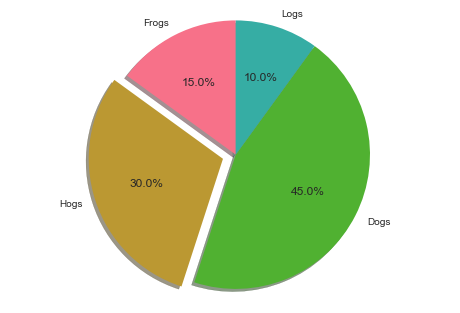

In [63]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()